# Title
## Brandon Shellenberger
#### In this project, I will demonstrate the use of jupyter notebooks while eploring a common dataset, iris.csv.
#### The 'iris.csv' dataset is stored in the Seaborn library.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# Load dataset into DataFrame
df = sns.load_dataset('iris')

# General inspection of dataset
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [6]:
# Inspects statistics on each numerical column
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


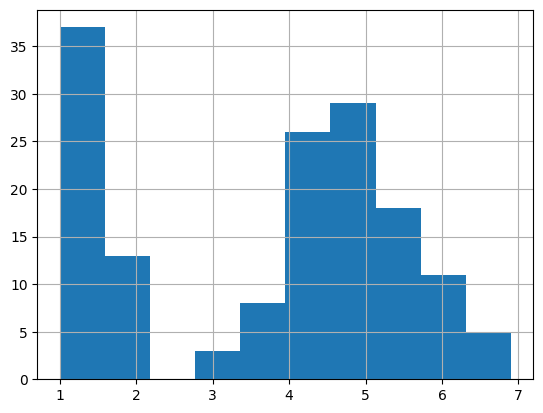

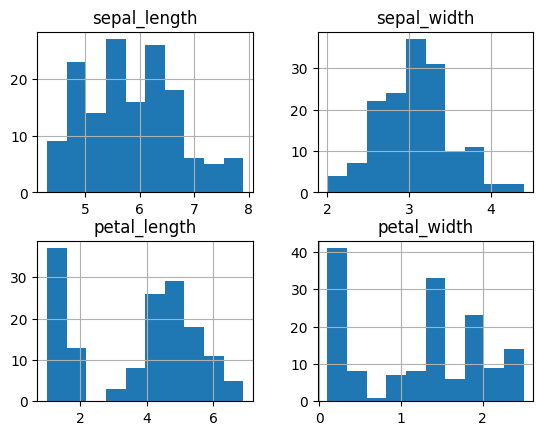

In [10]:
# Displays a histogram of one numerical column
df['petal_length'].hist()

# Displays a histogram of all the numberical columns
df.hist()

# Displays all the graphs above
plt.show()

## Observations of each numerical column

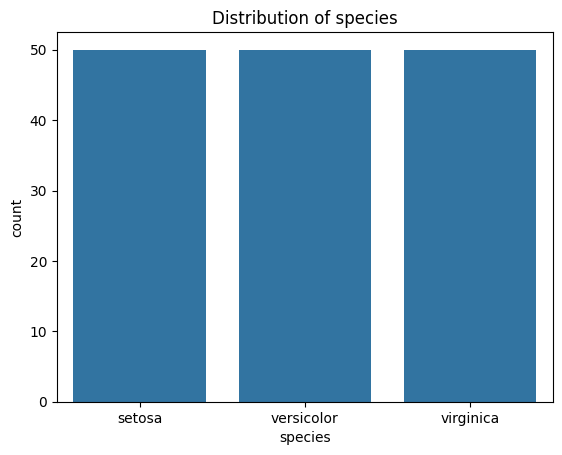

In [12]:
# Inspects value counts for one categorical column
df['species'].value_counts()

# Inspects value counts for all categorical columns
for col in df.select_dtypes(include=['object','category']).columns:
    # Displays count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

plt.show()

## Observations of each categorical column

In [13]:
# Renaming column names
df.rename(columns={'sepal_length': 'SepalLength'}, inplace=True)
df.rename(columns={'sepal_width': 'SepalWidth'}, inplace=True)
df.rename(columns={'petal_length': 'PetalLength'}, inplace=True)
df.rename(columns={'petal_width': 'PetalWidth'}, inplace=True)
df.rename(columns={'species': 'Species'}, inplace=True)

# Adding new columns
df['PetalRatio'] = df['PetalLength'] / df['PetalWidth']
df['SepalRatio'] = df['SepalLength'] / df['SepalWidth']

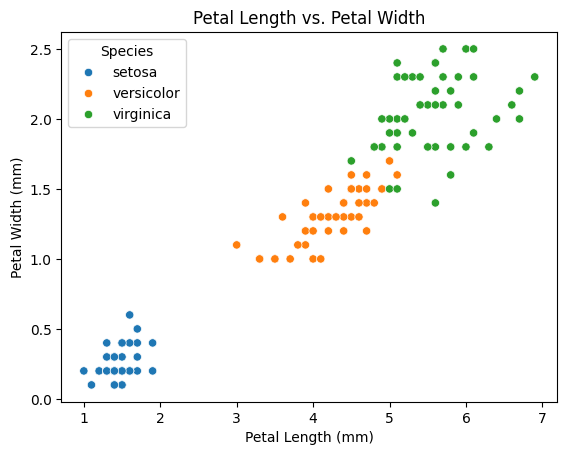

In [19]:
# scatter plot with seperations in different colors
sns.scatterplot(df, x= 'PetalLength', y= 'PetalWidth' , hue='Species')
plt.xlabel('Petal Length (mm)')
plt.ylabel('Petal Width (mm)')
plt.title('Petal Length vs. Petal Width')
plt.show()

## Observations for above scatterplot

In [ ]:
# scatter plot with seperations in different colors
sns.scatterplot(df, x= 'SepalLength', y= 'SepalWidth' , hue='Species')
plt.xlabel('Sepal Length (mm)')
plt.ylabel('Sepal Width (mm)')
plt.title('Sepal Length vs. Sepal Width')
plt.show()